In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)/255.0
y_train = y_train.astype(np.int32)
y_train = to_categorical(y_train, num_classes=len(set(y_train)))

x_test = x_test.reshape(-1, 28, 28, 1)/255.0
y_test = y_test.astype(np.int32)
y_test = to_categorical(y_test, num_classes=len(set(y_test)))

No handles with labels found to put in legend.


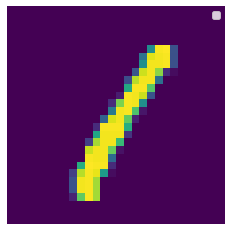

1


In [14]:
index = 3
vis = x_train.reshape(60000, 28, 28)
plt.imshow(vis[index,:,:])
plt.legend()
plt.axis("off")
plt.show()
print(np.argmax(y_train[index]))

In [16]:
numberOfClass = y_train.shape[1]

model = Sequential()

model.add(Conv2D(input_shape = (28, 28, 1), filters = 16, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = numberOfClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [17]:
hist = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs = 25, batch_size = 4000)

Epoch 1/25
15/15 [==============================] - 47s 3s/step - loss: 1.0089 - accuracy: 0.7021 - val_loss: 2.0027 - val_accuracy: 0.7285
Epoch 2/25
15/15 [==============================] - 46s 3s/step - loss: 0.2559 - accuracy: 0.9248 - val_loss: 2.1221 - val_accuracy: 0.1135
Epoch 3/25
15/15 [==============================] - 45s 3s/step - loss: 0.1497 - accuracy: 0.9553 - val_loss: 2.4347 - val_accuracy: 0.1135
Epoch 4/25
15/15 [==============================] - 45s 3s/step - loss: 0.1067 - accuracy: 0.9674 - val_loss: 2.7396 - val_accuracy: 0.1135
Epoch 5/25
15/15 [==============================] - 48s 3s/step - loss: 0.0840 - accuracy: 0.9747 - val_loss: 3.0620 - val_accuracy: 0.1135
Epoch 6/25
15/15 [==============================] - 52s 3s/step - loss: 0.0688 - accuracy: 0.9799 - val_loss: 3.3460 - val_accuracy: 0.1135
Epoch 7/25
15/15 [==============================] - 45s 3s/step - loss: 0.0607 - accuracy: 0.9821 - val_loss: 3.6402 - val_accuracy: 0.1135
Epoch 8/25
15/15 [==

In [18]:
model.save_weights("cnn_mist_model.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


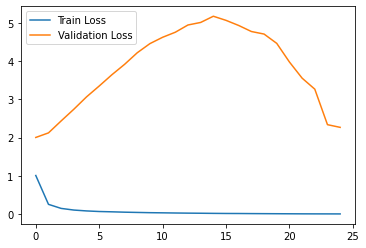

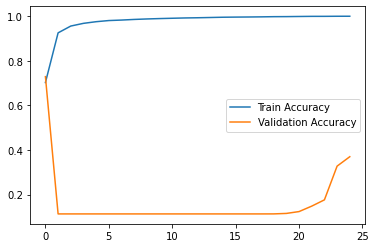

In [21]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [22]:
import json
with open("cnn_mist_hist.json", "w") as f:
    json.dump(hist.history, f)

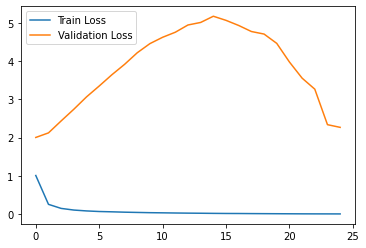

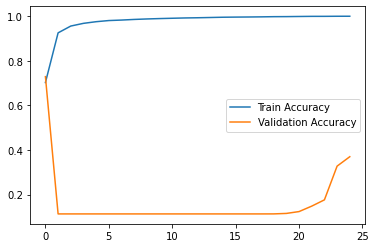

In [25]:
import codecs
with codecs.open("cnn_mist_hist.json", "r", encoding = "utf-8") as f:
    h = json.loads(f.read())
    
plt.figure()
plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train Accuracy")
plt.plot(h["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()